In [1]:
import pathlib
import pickle
import pandas as pd
import seaborn as sns
import regression as reg
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Leitura dos Dados Pré-Processados

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'projeto' / 'data'
print(DATA_DIR)

/home/jupyter/notebooks/projeto/data


In [3]:
PROCESSED_FILE_PATH = DATA_DIR / 'processed' / 'candidatos_centrais.pkl'

In [4]:
with open(PROCESSED_FILE_PATH, 'rb') as file:
    (
        df_centrais_prova,
        df_centrais_quest,
        df
    ) = pickle.load(file)

In [5]:
print(df_centrais_prova.shape)
df_centrais_prova.head(5)

(79, 35)


,index,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,...,Respostas Questionario,Acertos Totias,Questoes Especificas,Questoes Gerais,Gabarito Especificas,Gabarito Gerais,Acertos Gerais,Acertos Especificas,c_quest,c_prova
0,1385728,210053015811,3,F,G,G,2.0,N,B,D,...,BGGNBDDBABBBBBBCCD,96,DABECAEABADCAECAEDEBBAEABDABCBDCCECDDDCADCACDC...,DAEABABDACCBEABDADBBDDEBBAACDCDCBBEACAAEBBABAA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,48.0,48.0,0.014063,0.859375
4,1288196,210052768440,5,F,E,B,7.0,G,A,B,...,EEBGABDBBBCAAAABEB,40,BBDBECCABCDBACCDBBBEDAEBEEADBAEBDECCBDDBEABBAB...,DBAABAABDABAEEACBADABAEDBBAAEDDABCDADABCCAAADA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,15.0,25.0,0.017969,0.834375
6,2290564,210051372886,1,F,E,E,4.0,D,A,C,...,DEEDACDAABBBBBACDB,49,ABACAAECABDBDCCBBCCBAAEADEADBDEEAECCCDABDADEEC...,DCAACCADADDDBABCDCBDAAECDBACDCDCBCCDDCAABEADBA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,26.0,23.0,0.027344,0.912500
9,1375946,210054129416,3,M,D,E,4.0,F,A,C,...,DDEFACECABBBBBABEC,75,DBBCBDDBBCDCAEBCECABBAAADBABDBDDBEDEDDBDDCDCAC...,DEBACAABACCCEABDADDEDBCBDAEDACDCBBEBDBAAEEABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,41.0,34.0,0.070312,0.806250
12,81452,210053842564,1,F,E,E,2.0,B,A,B,...,BEEBABCAABBBABABCA,66,BDCBCAECBBCBECCAACBDBCEBDAABBCBBCEDBADCDAABCCB...,DEBBCCBDACBBEAADCAECCAEDDACEDCBCACEABDAEABABAD...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,32.0,34.0,0.058594,0.856250


In [6]:
print(df_centrais_quest.shape)
df_centrais_quest.head(5)

(79, 35)


,index,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,...,Respostas Questionario,Acertos Totias,Questoes Especificas,Questoes Gerais,Gabarito Especificas,Gabarito Gerais,Acertos Gerais,Acertos Especificas,c_quest,c_prova
49,1528233,210053805767,10,F,C,B,2.0,C,A,B,...,BCBCABCBABAAABAACC,80,BDEEDAECBDCBEDEABEEBAEAABCADCEDEEEEBABADEAAADC...,EEBADCADAECBEBBEEECDBDADBBACDDECBBEEEEAEBBAAAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,38.0,42.0,0.918750,0.144531
58,1777517,210052753065,3,M,C,C,2.0,B,A,C,...,BCCBACCAABBBAAABCA,66,DBCCBABEDAECDDBADCEBCAEBBDCCBABEAEC*ECDBEABDCC...,DBEBEDBBACBCEABADCABDDDCDEADDDACACEADABEAEABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,32.0,34.0,0.975000,0.181250
62,1560309,210054435854,3,F,C,G,3.0,C,A,B,...,CCGCABCAABABAAABCA,44,BEEBABCABABCEC.CBAADBAAACDCCDBEDAEBCCEBEAABEEC...,DEEACBBDACBBEADEEABADDEDDEADDCACBCDAEEBACBABDA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,27.0,17.0,0.968750,0.200781
77,597497,210052833780,3,M,E,E,2.0,B,A,B,...,BEEBABBBBBAAAAABCA,50,BADCBCBACECCDBDDBCABDBDBBADBBACEBECCABCCDBBDDB...,DADACEBCAEBAEABDEBAABCCCBBABCBBAABECEADEBAABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,27.0,23.0,0.984375,0.225781
82,1266144,210053590886,7,M,E,F,2.0,D,A,B,...,BEFDABBAABBAAAABCB,82,CDCDBADEBEBBADBAECEBBAEABACDDCCBCECBBCCBAAAEAC...,EAEACABCACBECBBEAABEBDDCDABADBDCCBBDEAAABEABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,42.0,40.0,0.956250,0.211719


In [7]:
print(df.shape)
df.head(5)

(400, 35)


,index,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,...,Respostas Questionario,Acertos Totias,Questoes Especificas,Questoes Gerais,Gabarito Especificas,Gabarito Gerais,Acertos Gerais,Acertos Especificas,c_quest,c_prova
0,1385728,210053015811,3,F,G,G,2.0,N,B,D,...,BGGNBDDBABBBBBBCCD,96,DABECAEABADCAECAEDEBBAEABDABCBDCCECDDDCADCACDC...,DAEABABDACCBEABDADBBDDEBBAACDCDCBBEACAAEBBABAA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,48.0,48.0,0.014063,0.859375
1,1115413,210051933541,3,F,G,F,5.0,N,A,D,...,EGFNADDCABABABADEB,140,DDCEBADCBEBBADBAEDEBBAEEBDABABDEBEEBBBAEECDCBC...,DEDADCBDAECCEADDAEBECDACBACCDDDCBBCDEAAEBCABAB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,54.0,86.0,0.016406,0.207031
2,1045860,210053992236,6,F,B,B,6.0,B,A,C,...,FBBBACCAABAAAAABCA,42,EACBACBADCBBDCADCBEDCCBBBAAAEECBADBDBBECADEBBC...,DEEAADBAAABACACBABCDABECADBACDDECADCEEDCACBCBA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,19.0,23.0,0.035938,0.204688
3,1229092,210054314262,3,M,F,E,3.0,D,A,C,...,CFEDACCBABBBAAABDB,70,DABAAACBBEBAAECAEEEBBCECDCADABCDEECDBDCDBBADAB...,DCDEECABDCCEEADDCABCADBBBACDCBACBDDECABEAEABDB...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,30.0,40.0,0.162500,0.152344
4,1288196,210052768440,5,F,E,B,7.0,G,A,B,...,EEBGABDBBBCAAAABEB,40,BBDBECCABCDBACCDBBBEDAEBEEADBAEBDECCBDDBEABBAB...,DBAABAABDABAEEACBADABAEDBBAAEDDABCDADABCCAAADA...,DDCEBADCBEBBADBAEDEBBAEABDABCEDEBEEBBCABEDDCBC...,DCEADABDACDCEABDADBEDDEBBACCDDDCBBBBEAAEBCABAB...,15.0,25.0,0.017969,0.834375


## Verificando Perfil dos Candidatos Centrais

### Para os centrais na Rede da Prova

In [8]:
colunas_de_interesse = ['TP_FAIXA_ETARIA','TP_SEXO', 'Acertos Gerais', 'Acertos Especificas', 'c_quest', 'c_prova']

In [9]:
summary_prova = df_centrais_prova[colunas_de_interesse].describe()
summary_prova

,TP_FAIXA_ETARIA,Acertos Gerais,Acertos Especificas,c_quest,c_prova
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,4.164557,27.417722,30.329114,0.243968,0.875000
std,3.982109,10.252714,12.471220,0.301497,0.071716
min,1.000000,11.000000,16.000000,0.000000,0.753125
25%,2.000000,20.500000,23.000000,0.057813,0.814063
50%,3.000000,26.000000,27.000000,0.127344,0.875000
75%,4.500000,32.000000,32.000000,0.232813,0.935937
max,16.000000,51.000000,84.000000,0.996875,0.996875


### Para os centrais na Rede de Questionário

In [10]:
summary_quest = df_centrais_quest[colunas_de_interesse].describe()
summary_quest

,TP_FAIXA_ETARIA,Acertos Gerais,Acertos Especificas,c_quest,c_prova
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,4.772152,30.417722,33.810127,0.875000,0.270916
std,3.915614,10.852871,14.117707,0.071716,0.291351
min,1.000000,11.000000,15.000000,0.753125,0.002344
25%,2.000000,22.500000,24.000000,0.814063,0.101953
50%,3.000000,28.000000,30.000000,0.875000,0.167969
75%,6.500000,39.500000,41.000000,0.935937,0.226953
max,17.000000,55.000000,78.000000,0.996875,0.993750


In [11]:
questoes_socio = ['Q001', 'Q002', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
                  'Q013','Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024', 'Q005_str']

In [12]:
centro_quest = df.loc[df['c_quest'] > 0.6]
periferia_quest = df.loc[df['c_quest'] < 0.6]

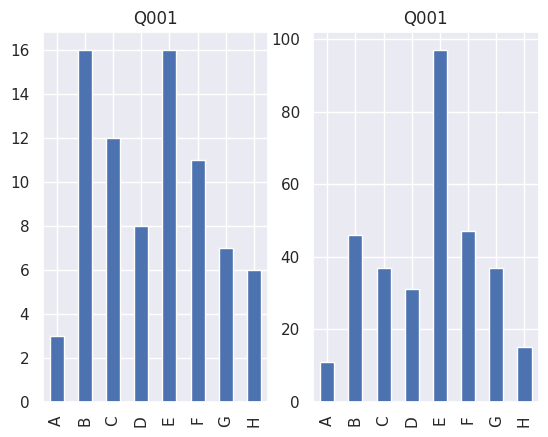

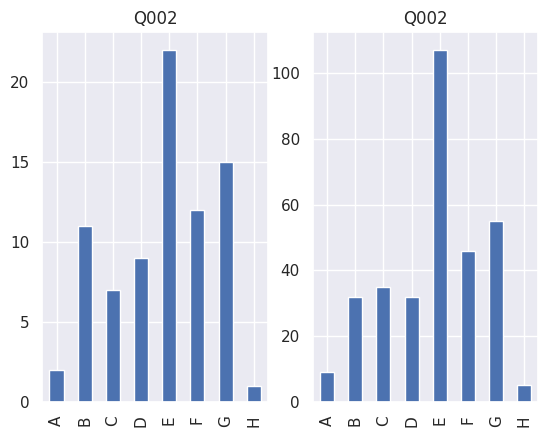

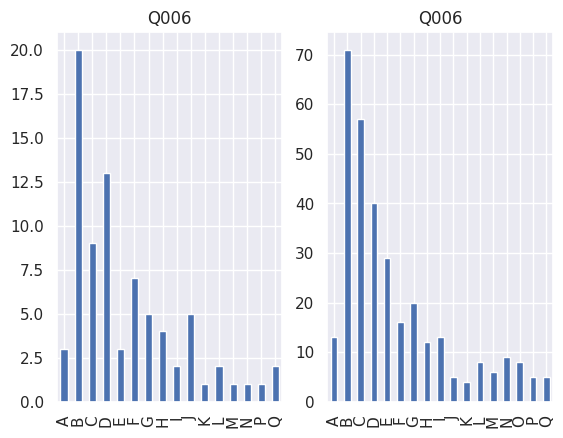

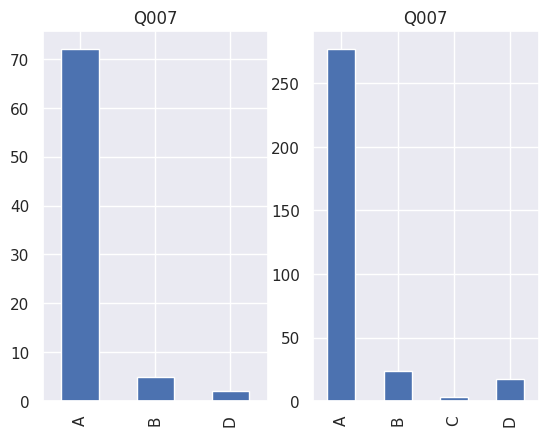

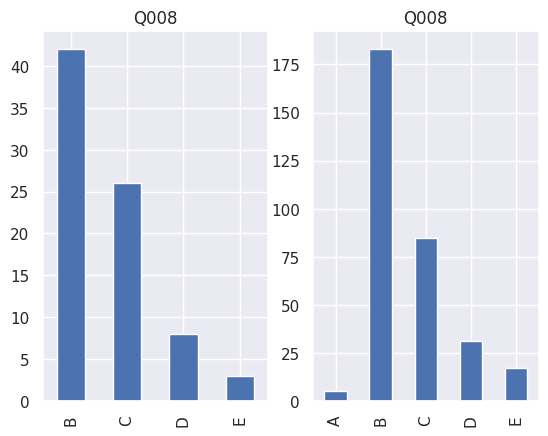

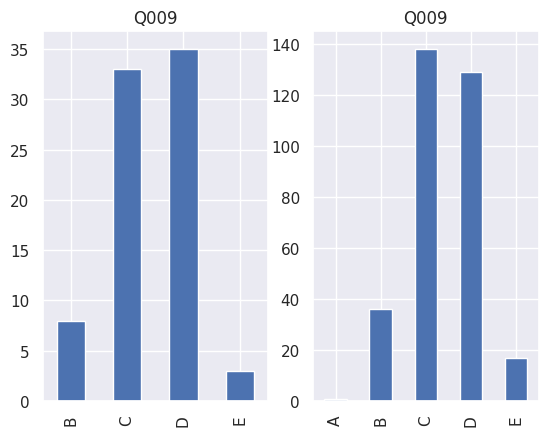

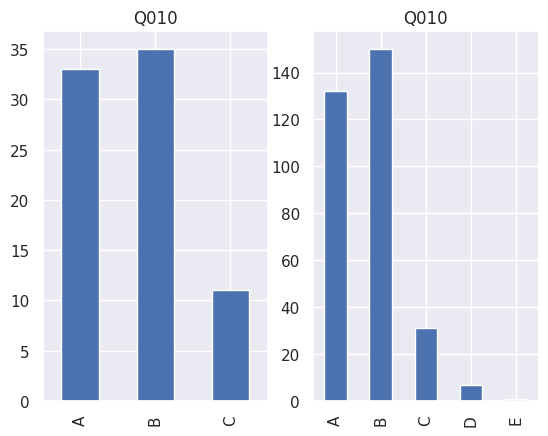

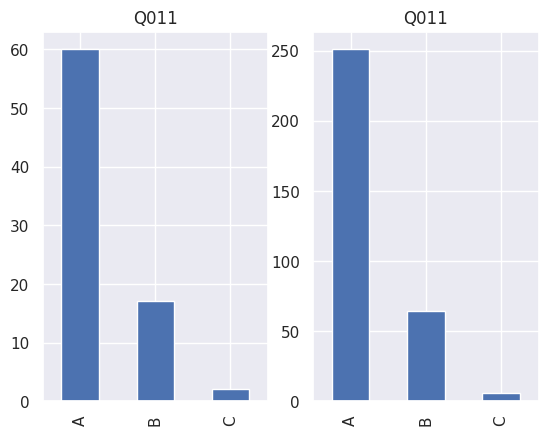

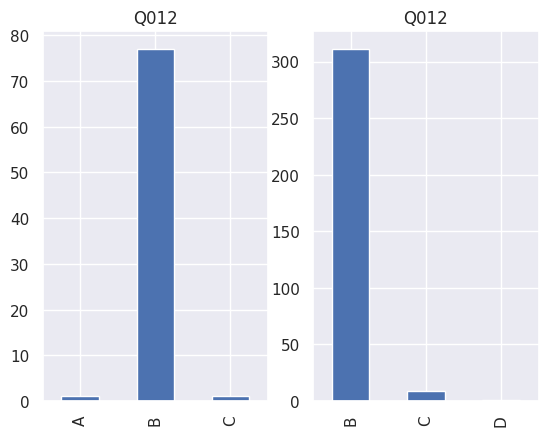

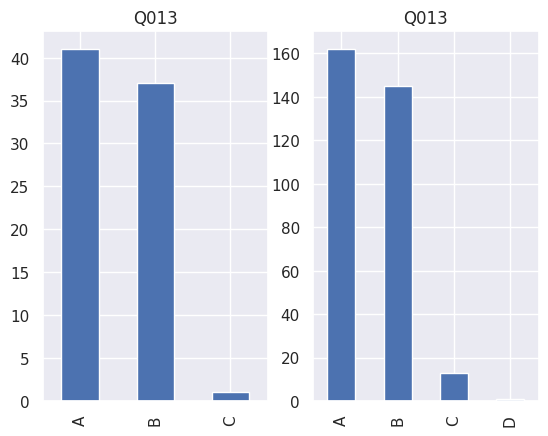

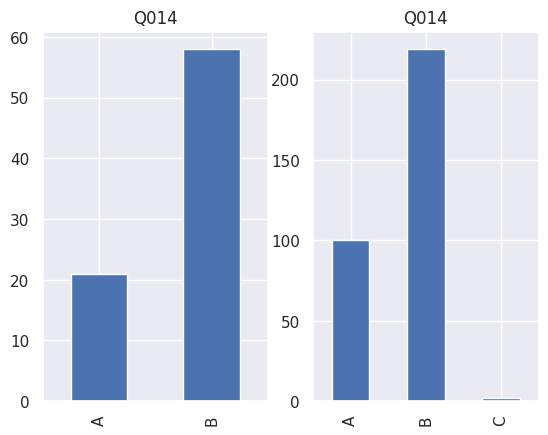

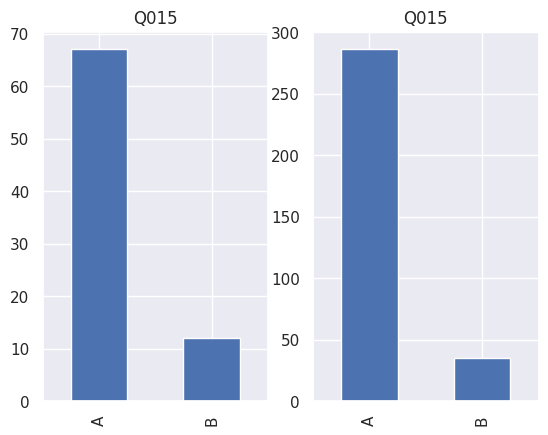

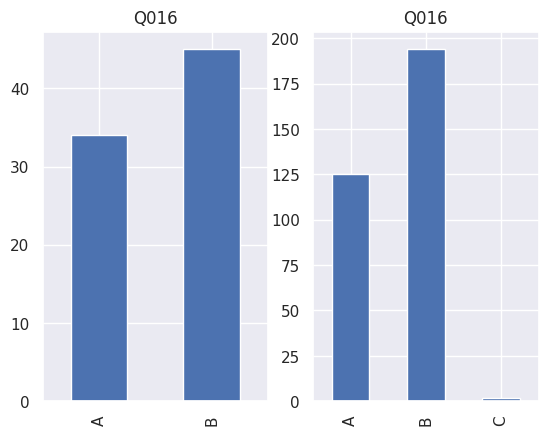

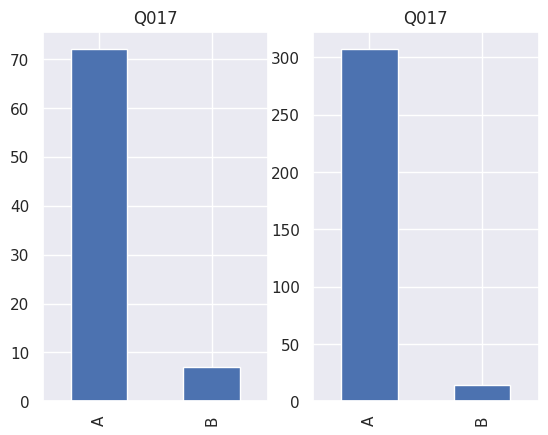

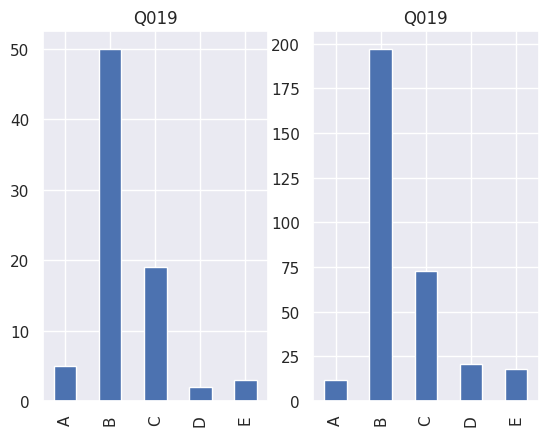

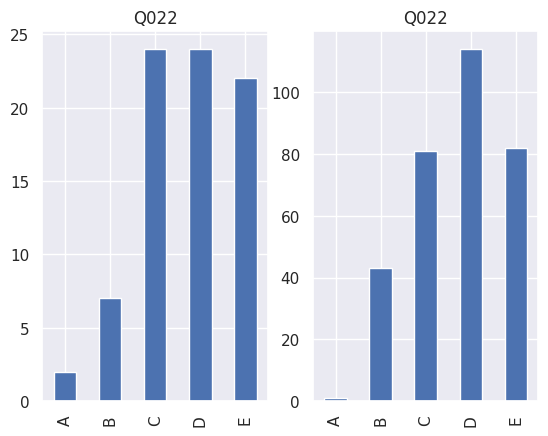

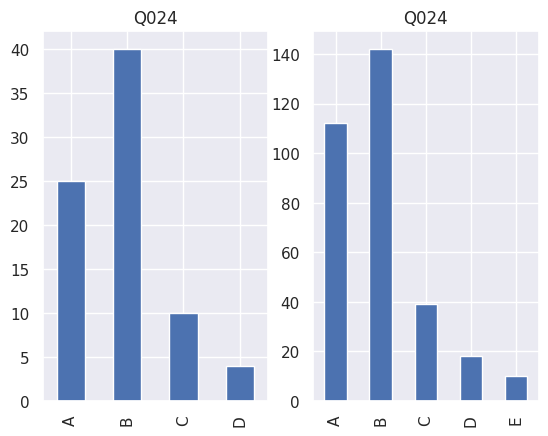

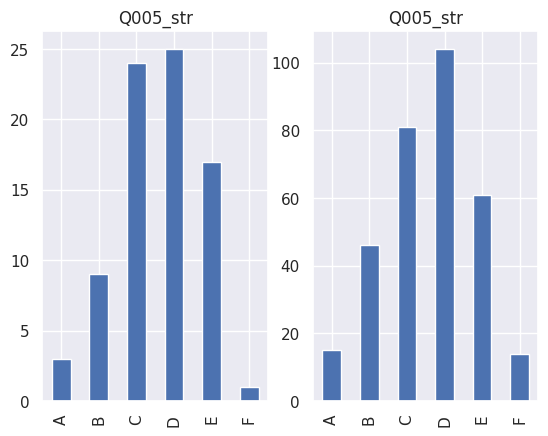

In [13]:
for i, quest in enumerate(questoes_socio):
    plt.figure()
    value_counts_q = centro_quest[quest].value_counts().sort_index()
    value_counts_p = periferia_quest[quest].value_counts().sort_index()
    plt.subplot(1, 2, 1)
    value_counts_q.plot(kind='bar', title = quest)
    plt.subplot(1, 2, 2)
    value_counts_p.plot(kind='bar', title = quest)
    plt.show()

Pontos de Diferença:
 - Q024: mais pessoas na periferia sem computador
 - Q023: pessoas na periferia tem mais telefones celulares
 - Q016: mais pessoas no centro sem microondas
 - Q010: mais pessoas na periferia não tem carro
 - Q006: pessoas na periferia parecem ser mais pobres (melhor distribuição de renda no centro)
 - Q002: pessoas no centro parecem ter mães com grau de educação maior do que na periferia

### Aplicando Staircase Encoding

In [14]:
values = list(df['TP_FAIXA_ETARIA'].unique())
values.sort()
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [15]:
length = len(values) - 1

dummies = [[] for i in range(length)]

In [16]:
for value in df['TP_FAIXA_ETARIA']:
    index = values.index(value)

    for i in range(index):
        dummies[i].append(1)

    for i in range(index, length):
        dummies[i].append(0)

In [17]:
for value, dummy in zip(values[1:], dummies):
    df[f'TP_FAIXA_ETARIA{value}'] = dummy

## Aplicando dummies em `TP_SEXO`

In [18]:
df = pd.get_dummies(df, columns=['TP_SEXO'])

In [19]:
df['c_quest'] = df['c_quest'].astype(float)
df['c_prova'] = df['c_prova'].astype(float)

In [20]:
df_centrais_prova = df.loc[df['c_prova'] > 0.6 ]
df_periferia_prova = df.loc[df['c_prova'] < 0.6 ]

## Fazendo Regressões

### Verificando efeitos separadamente

#### 1. Centralidade do Questionário

In [21]:
result = reg.linear(data=df, formula='c_prova ~ c_quest')
result.micro_summary()

variable,coefficient,std error,p-value
c_quest,-0.025492,0.050109,0.611224


#### 2. Sexo

In [22]:
result = reg.linear(data=df, formula='c_prova ~ TP_SEXO_F')
result.micro_summary()

variable,coefficient,std error,p-value
TP_SEXO_F,-0.010057,0.032026,0.753657


#### 3. Faixa Etária

In [23]:
result = reg.linear(data=df, 
                    formula='c_prova ~ TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14')
result.micro_summary()

variable,coefficient,std error,p-value
TP_FAIXA_ETARIA2,-0.032783,0.055126,0.552394
TP_FAIXA_ETARIA3,-0.053487,0.046649,0.252272
TP_FAIXA_ETARIA4,0.004388,0.056455,0.938090
TP_FAIXA_ETARIA5,0.033557,0.076637,0.661725
TP_FAIXA_ETARIA6,-0.036793,0.095342,0.699777
TP_FAIXA_ETARIA7,-0.081250,0.102810,0.429843
TP_FAIXA_ETARIA8,0.216970,0.192340,0.259997
TP_FAIXA_ETARIA9,-0.216146,0.235568,0.359426
TP_FAIXA_ETARIA10,0.052865,0.185344,0.775625
TP_FAIXA_ETARIA11,0.027325,0.131776,0.835837


### Análise Conjunta

In [24]:
result = reg.linear(data = df, formula = 'c_prova ~ c_quest + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14')

In [25]:
result.micro_summary()

variable,coefficient,std error,p-value
c_quest,-0.026806,0.051196,0.600868
TP_SEXO_M,0.015577,0.032862,0.635749
TP_FAIXA_ETARIA2,-0.031143,0.055362,0.574080
TP_FAIXA_ETARIA3,-0.054871,0.046793,0.241667
TP_FAIXA_ETARIA4,0.005995,0.056657,0.915788
TP_FAIXA_ETARIA5,0.032612,0.076834,0.671478
TP_FAIXA_ETARIA6,-0.033440,0.095676,0.726898
TP_FAIXA_ETARIA7,-0.082300,0.103085,0.425148
TP_FAIXA_ETARIA8,0.222954,0.193051,0.248851
TP_FAIXA_ETARIA9,-0.234813,0.237829,0.324107


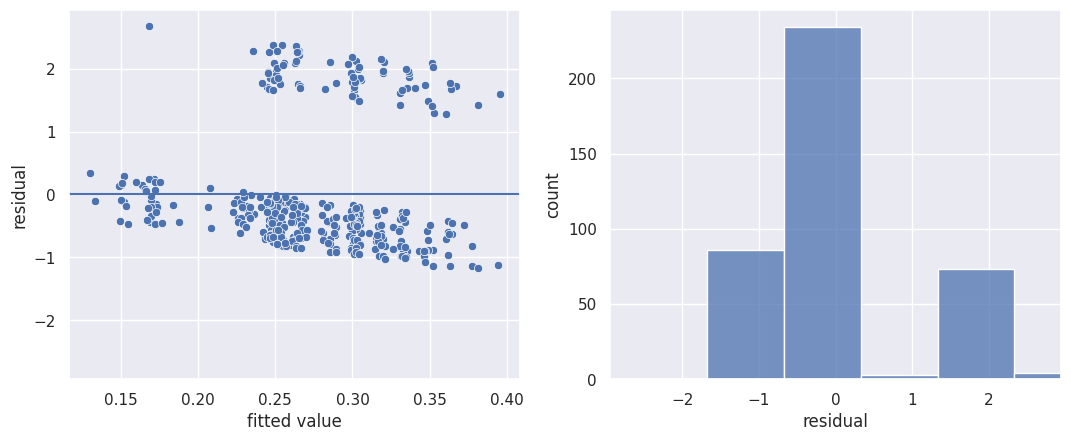

In [26]:
result.plot_residuals()

In [27]:
result = reg.linear(data = df_centrais_prova, formula = 'c_prova ~ c_quest + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14')

In [28]:
result.micro_summary()

variable,coefficient,std error,p-value
c_quest,-0.020144,0.031833,0.529089
TP_SEXO_M,0.018135,0.018826,0.338966
TP_FAIXA_ETARIA2,0.007419,0.025665,0.773433
TP_FAIXA_ETARIA3,0.002835,0.025244,0.910944
TP_FAIXA_ETARIA4,-0.021936,0.033174,0.510793
TP_FAIXA_ETARIA5,0.054602,0.042047,0.198673
TP_FAIXA_ETARIA6,-0.005967,0.053634,0.911756
TP_FAIXA_ETARIA7,0.086131,0.086030,0.320457
TP_FAIXA_ETARIA8,-0.102609,0.106959,0.340945
TP_FAIXA_ETARIA9,-0.044009,0.052723,0.406931


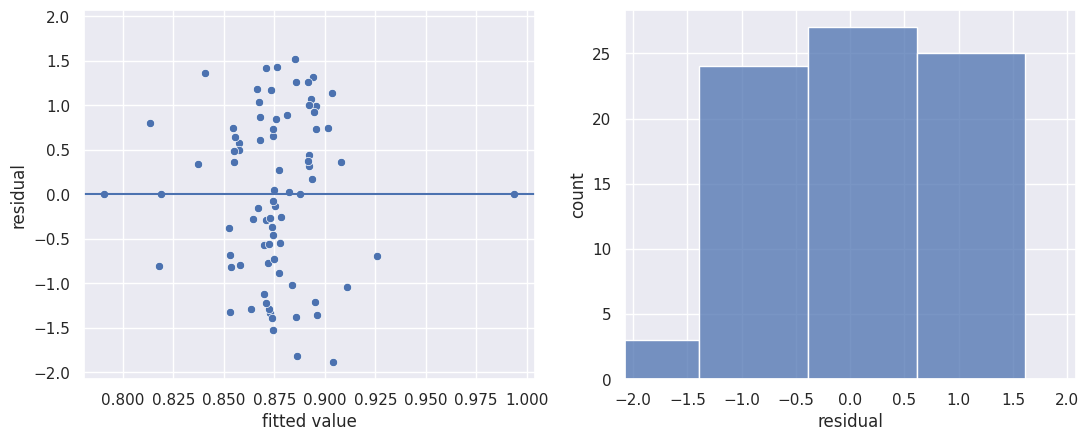

In [29]:
result.plot_residuals()

In [30]:
result = reg.linear(data = df_periferia_prova, formula = 'c_prova ~ c_quest + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14')

In [31]:
result.micro_summary()

variable,coefficient,std error,p-value
c_quest,0.031849,0.013490,0.018860
TP_SEXO_M,-0.006943,0.008563,0.418102
TP_FAIXA_ETARIA2,0.004542,0.015195,0.765194
TP_FAIXA_ETARIA3,-0.003925,0.012299,0.749842
TP_FAIXA_ETARIA4,0.014729,0.014566,0.312724
TP_FAIXA_ETARIA5,0.008551,0.019996,0.669234
TP_FAIXA_ETARIA6,-0.017700,0.024754,0.475141
TP_FAIXA_ETARIA7,0.000683,0.025599,0.978731
TP_FAIXA_ETARIA8,0.006724,0.054131,0.901231
TP_FAIXA_ETARIA9,0.052217,0.063162,0.409039


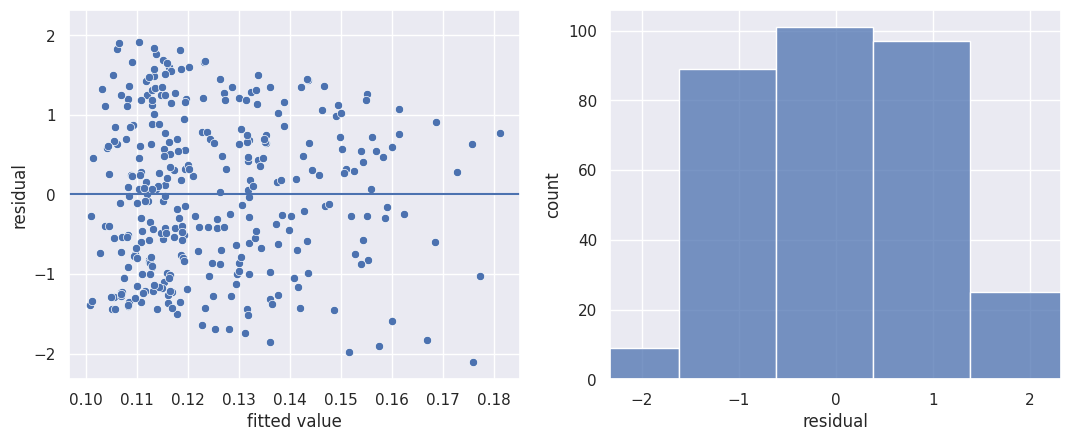

In [32]:
result.plot_residuals()

## Refazendo regressões discretizando centro e periferia

In [33]:
df['CENTRO_QUEST'] = df.apply(lambda row: 1 if row['c_quest'] > 0.6 else 0, axis = 1)
df['CENTRO_PROVA'] = df.apply(lambda row: 1 if row['c_prova'] > 0.6 else 0, axis = 1)

In [34]:
df.head(5)

,index,NU_INSCRICAO,TP_FAIXA_ETARIA,Q001,Q002,Q005,Q006,Q007,Q008,Q009,...,TP_FAIXA_ETARIA13,TP_FAIXA_ETARIA14,TP_FAIXA_ETARIA15,TP_FAIXA_ETARIA16,TP_FAIXA_ETARIA17,TP_FAIXA_ETARIA18,TP_SEXO_F,TP_SEXO_M,CENTRO_QUEST,CENTRO_PROVA
0,1385728,210053015811,3,G,G,2.0,N,B,D,D,...,0,0,0,0,0,0,1,0,0,1
1,1115413,210051933541,3,G,F,5.0,N,A,D,D,...,0,0,0,0,0,0,1,0,0,0
2,1045860,210053992236,6,B,B,6.0,B,A,C,C,...,0,0,0,0,0,0,1,0,0,0
3,1229092,210054314262,3,F,E,3.0,D,A,C,C,...,0,0,0,0,0,0,0,1,0,0
4,1288196,210052768440,5,E,B,7.0,G,A,B,D,...,0,0,0,0,0,0,1,0,0,1


In [35]:
df_centro_quest = df.loc[df['CENTRO_QUEST'] == 1]

In [36]:
df_periferia_quest = df.loc[df['CENTRO_QUEST'] == 0]

In [38]:
results = reg.linear(data=df, formula='CENTRO_PROVA ~ CENTRO_QUEST + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14')
results.micro_summary()

variable,coefficient,std error,p-value
CENTRO_QUEST,-0.025686,0.051002,0.614814
TP_SEXO_M,0.022536,0.042391,0.595294
TP_FAIXA_ETARIA2,-0.044870,0.071380,0.529985
TP_FAIXA_ETARIA3,-0.069528,0.060319,0.249760
TP_FAIXA_ETARIA4,-0.000770,0.073048,0.991597
TP_FAIXA_ETARIA5,0.025251,0.099050,0.798913
TP_FAIXA_ETARIA6,-0.029406,0.123320,0.811660
TP_FAIXA_ETARIA7,-0.112188,0.132927,0.399204
TP_FAIXA_ETARIA8,0.286717,0.248923,0.250108
TP_FAIXA_ETARIA9,-0.358797,0.306640,0.242688
